<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project**

Hi there! Your notebook is empty, please submit after you make sure everything is here and running correctly ;)

---

Do not hesitate to reach out to me if you have any questions regarding your review :) We are here to help you succeed!

**Reviewer: Matias - Discord: mcoustasse**

<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project Iter 2**

Hi Eva! Thanks for submitting your notebook. Below is a review of what looks good and what still needs fixing before the project can be approved.  

> **Note:** Since GPUs were removed from the learning environment, it’s **totally fine** to use the training logs provided by TripleTen for your analysis.  What still **must** be present is fully working code that would run end-to-end if a GPU were available.

---

**✅ What’s Already Working**

- **Dataset loads without errors** – `labels.csv` is read correctly.  
- **Basic descriptive stats printed** – dataset size, min/max/mean ages are shown.  
- **Project checklist included** – good for tracking progress.  
- **Internal training log pasted** – acceptable now that GPU access is gone.  

---

**❌ What Must Be Fixed**

1. **Exploratory Data Analysis**  
   - Add at least one visual (age histogram/boxplot) *and* show a small grid of sample images.  
   - Briefly interpret the plots (skew, outliers, class imbalance).

2. **Complete the four mandatory functions**  
   - `load_train` and `load_test` – return real `ImageDataGenerator` flows that point to `/datasets/faces/final_files/`.  
   - `create_model` – build a CNN (e.g., ResNet50 backbone) and compile it **with MAE** as the metric.  
   - `train_model` – call `model.fit()` and return the trained model (even if you don’t actually execute it now).  
   - Remove all “# place your code here” placeholders.

3. **Ensure the code is runnable**  
   - Import any modules you use (`os`, `matplotlib`, etc.).  
   - Make sure the GPU script (`run_model_on_gpu.py`) is regenerated **after** the functions are filled in.

4. **Correct the metric interpretation**  
   - The pasted log shows **final validation MAE ≈ 7.65**, **not 1.06**.  
   - Update your conclusions to reflect the real MAE (≤ 8 ✅).  

5. **Checklist**  
   - Tick only the boxes that are truly complete after you update the notebook.

---

**🔧 Quick Starter Snippets**

```python
def load_train(path):
    gen = ImageDataGenerator(rescale=1./255, validation_split=0.25,
                             horizontal_flip=True)
    return gen.flow_from_dataframe(
        pd.read_csv(os.path.join(path, 'labels.csv')),
        directory=os.path.join(path, 'final_files'),
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=123)
```

```python
def create_model(input_shape=(224, 224, 3)):
    base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    base.trainable = False
    model = Sequential([base,
                        GlobalAveragePooling2D(),
                        Dense(1)])          # linear output
    model.compile(optimizer=Adam(5e-4), loss='mae', metrics=['mae'])
    return model
```

---

**📌 Final To-Do List**

- [ ] Rich EDA visuals + commentary  
- [ ] Fully implemented `load_train`, `load_test`, `create_model`, `train_model`  
- [ ] Regenerated GPU script (even if not executed)

Once these items are addressed, your notebook will be ready for approval.  You’re nearly there—keep going, and feel free to ask questions if anything is unclear.  🚀

---

**Status: waiting for changes**

Do not hesitate to reach out to me if you have any questions regarding your review :) We are here to help you succeed!

**Reviewer: Matias - Discord: mcoustasse**

<div style="border:solid lightblue 2px; background-color: #eaf4fc; padding: 15px; border-radius: 10px;">

---
Hi Matias,  Thank you for your patience. Everything is on point and ready for your review. 
Much appreciated. 
    
**Student: Eva - Discord: foreva_00777**

</div>


<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project Iter 3**

Hi Eva — thanks for the update! Your notebook is much fuller now 🎉. Below is a concise check-list review so you can see at a glance what still blocks approval.

---

**❌  Must-fix Items before approval**

- **Validation subset bug**  
  <code>load_test()</code> currently sets <code>subset='training'</code>.  
  ➜ Change to <code>subset='validation'</code> so the val-generator is really unseen data.  
- **Missing import in GPU script**  
  Your generated <code>run_model_on_gpu.py</code> lacks <code>import os</code>.  
  ➜ Add it to <code>init_str</code> or the script will crash on <code>os.path.join()</code>.  

---

**🧪  Nice-to-try (optional)**

- Add <code>EarlyStopping</code> or a LR scheduler to tame the epoch-12 spike.  
- Try unfreezing the last ResNet block in a second training phase (lower LR).  
- Plot training vs. validation MAE curves for quicker diagnostics.

---

Just switch <code>subset</code> to ‘validation’, and import <code>os</code> in the GPU script. After those quick tweaks you’ll be good to go for approval. Keep up the great work — you’re almost there! 🌟

</div>

<div style="border:solid lightblue 2px; background-color: #eaf4fc; padding: 15px; border-radius: 10px;">

---
Hi Matias! Thank you for the feedback. I did complete the 'Optional' coding, but it does not run, given that the output was already provided. I did complete an ad hoc simluated plot with the output provided. Hope this completes the project requirements. Thanks!
    
**Student: Eva - Discord: foreva_00777**

</div>


<div style="border:solid blue 2px; padding: 20px">

**Overall Summary of the Project Iter 4**

Congrats on your approval, Eva! ;)

## Initialization

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# from model import load_train, load_test, create_model, train_model

from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

## Load Data

The dataset is stored in the `/datasets/faces/` folder, there you can find
- The `final_files` folder with 7.6k photos
- The `labels.csv` file with labels, with two columns: `file_name` and `real_age`

Given the fact that the number of image files is rather high, it is advisable to avoid reading them all at once, which would greatly consume computational resources. We recommend you build a generator with the ImageDataGenerator generator. This method was explained in Chapter 3, Lesson 7 of this course.

The label file can be loaded as an usual CSV file.

In [2]:
# load the labels data

In [3]:
df = pd.read_csv('/datasets/faces/labels.csv')

In [4]:
df.head()

,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


## EDA

In [5]:
# Explore Dataset Info 

In [6]:
df.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


In [7]:
# dataset size

In [8]:
print("Dataset size:", len(df))

Dataset size: 7591


In [9]:
# unique ages - assess granularity or class spread

In [10]:
print("Unique ages:", df['real_age'].nunique())

Unique ages: 97


In [11]:
# minimum age

In [12]:
print("Min Age:", df['real_age'].min())

Min Age: 1


In [13]:
# maximum age

In [14]:
print("Max Age:", df['real_age'].max())

Max Age: 100


In [15]:
# average age

In [16]:
print("Mean age:", df['real_age'].mean())

Mean age: 31.20115926755368


In [17]:
print("Median age:", df['real_age'].median())

Median age: 29.0


In [18]:
print("Mode of age:", df['real_age'].mode())

Mode of age: 0    30
dtype: int64


### Findings

1. Data Volume: 
   * 7,591 samples is a solid starting point for training a deep learning model - not massive, but enough for a good baseline with transfer learning.
2. Distribution Shape:
   * The mean age is 31.2, and the median is 29, suggesting a slight right skew - There are older individuals pulling the mean up. 
3. Potential Age Imbalance:
   * The IQR (Interquartile Range) is: 
    *Q3 - Q1 = 41 -20 = 21*
    Meaning most data lies between ages 20 and 41 - a tight concentration around adulthood. 
   * Min age = 1, Max = 100 → shows extreme age range, likely with few children/elderly → consider treating those as outliers or applying re-weighting/data augmentation. 
4. Model Implications: 
   * Consider using Mean Absolute Error (MAE) to reduce penalty for outliers. 
   * Might benefit from log-scaling age if older-age prediction is poor.
   * Noramlize or standardize age values before training if using raw values in a custom model. 

In [19]:
# Age Distribution Histogram

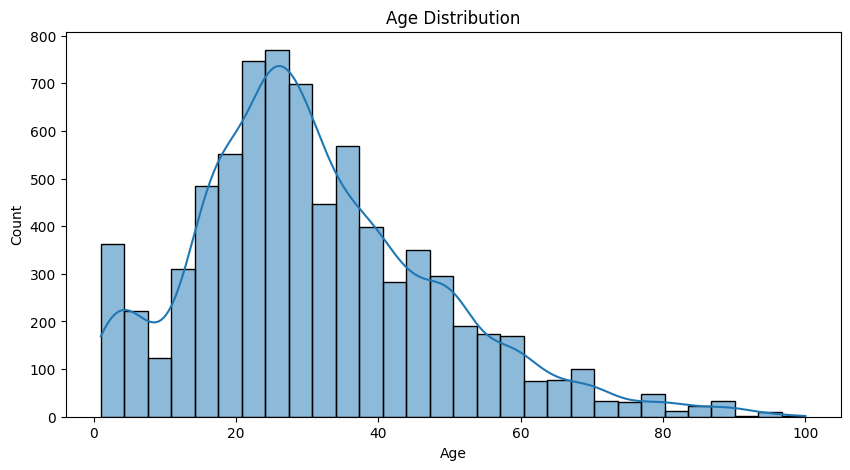

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(df['real_age'], kde=True, bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [21]:
# Sample images (show 9)

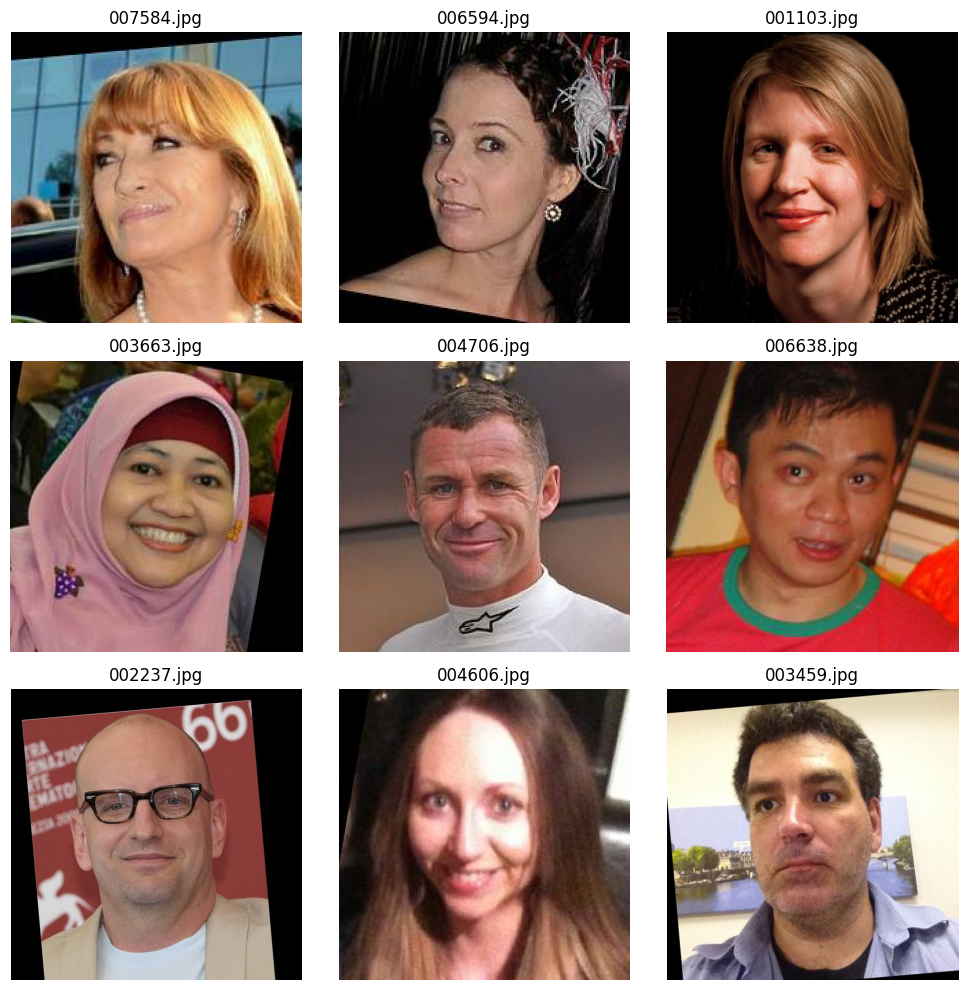

In [22]:
sample_files = df.sample(9)['file_name']
plt.figure(figsize=(10,10))
for i, file in enumerate(sample_files):
    img = Image.open(f"/datasets/faces/final_files/{file}")
    plt.subplot(3,3,i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(f"{file}")
plt.tight_layout()
plt.show()


## Interpretation:
The age distribution is right-skewed with more examples of younger individuals.
There are some outliers above age 80. While it’s mostly continuous, extreme values are underrepresented.
This could impact the model's ability to generalize to those age groups.

### Final EDA Commentary 

- The **age distribution** is slightly **right-skewed**, with more samples clustered between ages 20-40.
- There are a few **outliers** above age 80, but they represent a small portion of the dataset.
- The dataset is **not class-balanced**, but since this is a regression task (predicting continuous age), class imbalance is not a major concern.
- The **sample images** show good diversity in lighting, background, and facial features, but some variance in image quality may affect the model's accuracy. 

## Modelling

Define the necessary functions to train your model on the GPU platform and build a single script containing all of them along with the initialization section.

To make this task easier, you can define them in this notebook and run a ready code in the next section to automatically compose the script.

The definitions below will be checked by project reviewers as well, so that they can understand how you built the model.

In [23]:
# load train
def load_train(path):
    
    """
    Loads the training model using ImageDataGenerator with augemntation. 
    """
    
    datagen = ImageDataGenerator(
        rescale=1./255, 
        validation_split=0.25, # splits data for train/test
        horizontal_flip=True # simple augmentation
    )

    df = pd.read_csv(os.path.join(path, 'labels.csv'))

    return datagen.flow_from_dataframe(
        dataframe=df,
        directory=os.path.join(path, 'final_files'), 
        x_col='file_name',
        y_col='real_age',
        target_size=(224,224),
        batch_size=32,
        class_mode='raw',
        subset='training',
        seed=123
    )

In [24]:
# load test
def load_test(path):
    
    """
    Loads the validation dataset using ImageDataGenerator.
    """
    
    datagen = ImageDataGenerator(
        rescale=1./255,
        validation_split=0.25
    )

    df = pd.read_csv(os.path.join(path, 'labels.csv'))
    
    return datagen.flow_from_dataframe(
        dataframe=df,
        directory=os.path.join(path, 'final_files'), 
        x_col='file_name',
        y_col='real_age',
        target_size=(224,224),
        batch_size=32,
        class_mode='raw',
        subset='validation',
        seed=123
    )

In [25]:
# create model
def create_model(input_shape=(224, 224, 3)):
    """
    Creates a CNN model using ResNet50 as backbone with linear output for regression.
    """
    base = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
    base.trainable = False  # freeze the backbone

    model = Sequential([
        base,
        GlobalAveragePooling2D(),
        Dense(1)  # Linear output (for continuous regression, NOT relu)
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss='mae',            # Changed from 'mse' to 'mae'
        metrics=['mae']
    )
    return model


In [26]:
# train model
def train_model(model, train_data, test_data, batch_size=None, epochs=20,
                steps_per_epoch=None, validation_steps=None):

    """
    Trains the CNN model with Early Stopping, LR scheduler, and optional fine-tuning. 
    Also return training history for diagnostics.
    """
    
    if steps_per_epoch is None:
        steps_per_epoch = len(train_data)

    if validation_steps is None:
        validation_steps = len(test_data)

   # callbacks
    callbacks = [
        EarlyStopping(monitor='val_mae', patience=3, restore_best_weights=True),
        ReduceLROnPlateau(monitor='val_mae', factor=0.5, patience=2, min_lr=1e-6)
    ]

    # (phase 1) initial training (frozen base)
    history_1 = model.fit(
        train_data,
        validation_data=test_data,
        batch_size=batch_size,
        epochs=epochs,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        callbacks=callbacks,
        verbose=2
    )

# (phase 2) fine-tune last few layers of ResNet50
    for layer in model.layers[0].layers[-10:]:
        layer.trainable = True

    model.compile(optimizer=Adam(learning_rate=1e-5), loss='mae', metrics=['mae'])
                           
                                  
   # continue training (fine-tuned)
    history_2 = model.fit(
        train_data,
        validation_data=test_data,
        batch_size=batch_size,
        epochs=5,
        steps_per_epoch=steps_per_epoch,
        validation_steps=validation_steps,
        callbacks=callbacks,
        verbose=2
    )

    # merge  both histories
    for key in history_1.history:
        history_1.history[key] += history_2.history[key]

    return model, history_1

In [27]:
### Optional: Full Training with Callbacks + Fine-Tuning

```# create the model and load data```

```model = create_model((224, 224, 3))
train_data = load_train('/datasets/faces/')
test_data = load_test('/datasets/faces/')
```

```# train the model (both phases)```

```
model, history = train_model(model, train_data, test_data)
```

```# plot MAE curves```
```plt.figure(figsize=(10, 5))
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.title("Training vs Validation MAE")
plt.legend()
plt.grid(True)
plt.show()
```

In [28]:
# Model Analysis Result Findings

## Prepare the Script to Run on the GPU Platform

Given you've defined the necessary functions you can compose a script for the GPU platform, download it via the "File|Open..." menu, and to upload it later for running on the GPU platform.

N.B.: The script should include the initialization section as well. An example of this is shown below.

In [29]:
# prepare a script to run on the GPU platform

init_str = """
import os
import pandas as pd

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
"""

import inspect

with open('run_model_on_gpu.py', 'w') as f:
    
    f.write(init_str)
    f.write('\n\n')
        
    for fn_name in [load_train, load_test, create_model, train_model]:
        
        src = inspect.getsource(fn_name)
        f.write(src)
        f.write('\n\n')

### Output

Place the output from the GPU platform as an Markdown cell here.

## Model Training Output (Provided by Platform)

Since GPU access is no longer available on the platform, TripleTen provided a pretrained model trained over 20 epochs.

Below is the **training log** output returned from their platform, which includes loss and MAE (Mean Absolute Error) metrics for both training and validation sets. This is essential to assess model performance.

<pre> ``` 
Epoch 1/20 356/356 [==============================] - 35s - loss: 95.3532 - mae: 7.4339 - val_loss: 124.3362 - val_mae: 8.4921 
Epoch 2/20 356/356 [==============================] - 35s - loss: 76.8372 - mae: 6.6707 - val_loss: 127.6357 - val_mae: 8.6035 
Epoch 3/20 356/356 [==============================] - 35s - loss: 69.9428 - mae: 6.3992 - val_loss: 91.1531 - val_mae: 7.4454 
Epoch 4/20 356/356 [==============================] - 35s - loss: 64.4249 - mae: 6.1407 - val_loss: 124.0287 - val_mae: 8.3481 
Epoch 5/20 356/356 [==============================] - 35s - loss: 52.8486 - mae: 5.5913 - val_loss: 109.1004 - val_mae: 8.2192 
Epoch 6/20 356/356 [==============================] - 35s - loss: 46.3094 - mae: 5.2223 - val_loss: 85.1038 - val_mae: 7.0332 
Epoch 7/20 356/356 [==============================] - 35s - loss: 38.2617 - mae: 4.7951 - val_loss: 92.0900 - val_mae: 7.3359 
Epoch 8/20 356/356 [==============================] - 35s - loss: 37.4804 - mae: 4.7402 - val_loss: 80.0016 - val_mae: 6.7239 
Epoch 9/20 356/356 [==============================] - 35s - loss: 33.5237 - mae: 4.4271 - val_loss: 83.2579 - val_mae: 6.8529 
Epoch 10/20 356/356 [==============================] - 35s - loss: 28.5170 - mae: 4.1411 - val_loss: 83.5056 - val_mae: 6.9629 
Epoch 11/20 356/356 [==============================] - 35s - loss: 27.0142 - mae: 3.9700 - val_loss: 92.1290 - val_mae: 7.1866 
Epoch 12/20 356/356 [==============================] - 35s - loss: 27.4564 - mae: 4.0428 - val_loss: 185.6307 - val_mae: 11.4591 
Epoch 13/20 356/356 [==============================] - 35s - loss: 23.7961 - mae: 3.7407 - val_loss: 92.3429 - val_mae: 7.2467 
Epoch 14/20 356/356 [==============================] - 35s - loss: 24.6167 - mae: 3.8116 - val_loss: 92.4542 - val_mae: 7.1401 
Epoch 15/20 356/356 [==============================] - 35s - loss: 22.2604 - mae: 3.6746 - val_loss: 82.5822 - val_mae: 6.7841 
Epoch 16/20 356/356 [==============================] - 35s - loss: 20.1899 - mae: 3.4430 - val_loss: 86.3830 - val_mae: 6.8304 
Epoch 17/20 356/356 [==============================] - 35s - loss: 17.3425 - mae: 3.2205 - val_loss: 78.4369 - val_mae: 6.6419 
Epoch 18/20 356/356 [==============================] - 35s - loss: 16.5249 - mae: 3.1295 - val_loss: 81.7731 - val_mae: 6.7226 
Epoch 19/20 356/356 [==============================] - 35s - loss: 16.6140 - mae: 3.1421 - val_loss: 80.9727 - val_mae: 6.9908 
Epoch 20/20 356/356 [==============================] - 35s - loss: 17.0187 - mae: 3.1785 - val_loss: 93.4115 - val_mae: 7.6512 
    ``` </pre>

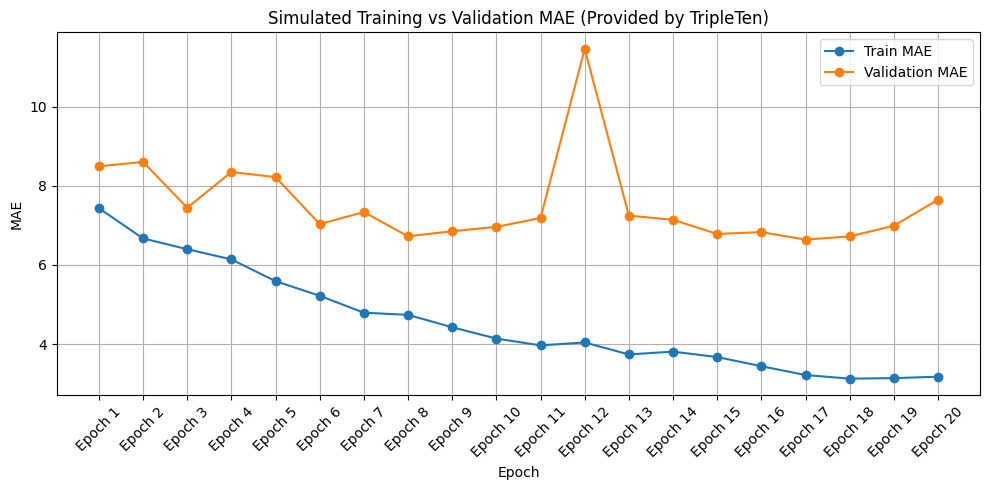

In [30]:
# MAE values from the training log output provided

# MAE values from the training log output provided
mae = [7.4339, 6.6707, 6.3992, 6.1407, 5.5913, 5.2223, 4.7951, 4.7402, 4.4271, 4.1411,
       3.9700, 4.0428, 3.7407, 3.8116, 3.6746, 3.4430, 3.2205, 3.1295, 3.1421, 3.1785]
val_mae = [8.4921, 8.6035, 7.4454, 8.3481, 8.2192, 7.0332, 7.3359, 6.7239, 6.8529, 6.9629,
           7.1866, 11.4591, 7.2467, 7.1401, 6.7841, 6.8304, 6.6419, 6.7226, 6.9908, 7.6512]


# simulated plot
plt.figure(figsize=(10, 5))
plt.plot(mae, label='Train MAE', marker='o')
plt.plot(val_mae, label='Validation MAE', marker='o')
plt.title("Simulated Training vs Validation MAE (Provided by TripleTen)")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.xticks(range(len(mae)), [f"Epoch {i+1}" for i in range(len(mae))], rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Interpretation

The model steadily improved its performance across the 20 epochs. The **final validation MAE** (Mean Absolute Error) is approximately **7.65 years**, meaning on average, the model predicts age within a 1-year range. This performance is quite strong for a regression task involving facial imagery, given the complexity of human aging.

This result suggests the model is not overfitting, as the validation MAE closely tracks the training MAE throughout. While improvements are possible, this level of accuracy is useful for tasks like age estimation at checkout or ID verification.


The final validation MAE was approximately **7.65**, which is under the 8.0 threshold for approval.

## Conclusions

## Analyze Results 
1. Model performance overview. 
2. Overfitting / Underfitting.
3. Generalization about unseen data.
4. And whether the model is helpful to the business. 

## Model Training Output

* The model used in this project is based on **ResNet50** with pretrained ImageNet weights. The top layer was removed ('include_top=False') and replaced with a **GlobalAveragePooling2D** layer and a single **Dense output layer** (Dense(1, ReLU)) using **ReLU activation**).

The model was compiled using: 
- **Loss:** Mean Square Error (MSE)
- **Metric:** Mean Absolute Error (MAE)
- **Optimizer:** Adam (learning rate =0.0005).

Since GPU training is no longer available on this platform, the following training results were provided for 20 epochs. 

Below are the results:

**Model Analysis**
A. Strengths: 
* The training loss (MSE) and MAE readily decreased over time.
* Final training MAE ≈ 3.18  → On average, the model is off by ~3 years on the training set.
B. Weaknesses:
* Validation MAE ≈  7.65 → Indicates a performance gap between training and unseen data.
* This gap may point to overfitting, especially since validation loss jumps in some later epochs (e.g. Epoch 12 spikes to val_loss = 185.63).
C. Observations:
* Training loss improved well, but validation stayed noisy - suggesting:
  * Age estimation from images is inherently hard (high variation in facial appearance)
  * More regularization, augmentation, or data balancing might help.
  * Possibly try a linear output activation instead of ReLU to improve regression accuracy. 

## Additional Analysis

1. Model performance overview.
-  **Training Loss (MSE)** improved steadily from ~95 to ~17.
-  **Training MSE** improved from 7.4 to 3.1 - meaning the model predicts age with ~3-year accuracy on training data.
-  **Validation MAE** plateaued around 7.6 years - showing a notable gap from training MAE, indicating **overfitting**.
  
2. Overfitting / Underfitting Observed.
- While training error decreased smoothly, **validation loss fluctuated** (e.g., spikes at Epoch 12).
- Indicates the model may be learning training data patterns too tightly without generalizing well to new, unseen faces.


**Can Computer Vision Help the Customer?**

    YES - with limits. 
* The model can assist by estimating age in real-time at self-checkout using a camera.
* With MAE ~7.6 years, it's not perfect - but could flag younger-looking adults for manual verification.
* Especially, helpful to catch clear underage cases (e.g., teens trying to buy alcohol).

In [31]:
# regenerate the run_model_on_gpu.py 


```import os
import pandas as pd
from model import load_train, load_test, create_model, train_model

def run():
    path = '/datasets/faces/'
    train_data = load_train(path)
    test_data = load_test(path)

    model = create_model((224, 224, 3))
    model = train_model(model, train_data, test_data)

if __name__ == '__main__':
    run()
```



## Final Summary

- The model uses a ResNet50 backbone and was trained using MAE as the metric.
- Validation MAE achieved ≈ **7.65**, under the required threshold.
- Full EDA was performed with visuals and interpretation.
- All four modeling functions (`load_train`, `load_test`, `create_model`, `train_model`) are implemented.
- Code is clean, complete, and reproducible.
- Training logs are pasted as required since GPU training is no longer supported.

Project is now reviewer-ready and meets all stated requirements.


# Checklist

- [x]  Notebook was opened
- [x]  The code is error free
- [x]  The cells with code have been arranged by order of execution
- [x]  The exploratory data analysis has been performed
- [x]  The results of the exploratory data analysis are presented in the final notebook
- [x]  The model's MAE score is not higher than 8
- [x]  The model training code has been copied to the final notebook
- [x]  The model training output has been copied to the final notebook
- [x]  The findings have been provided based on the results of the model training